In [1]:
import pandas as pd
import numpy as np

no_of_runs = 10

## MODIFIED GNN-SUBNET

The following cell obtains all data from the results files and pre-comutes it. The pre-processed data will then be aggregated into a single table of results

In [2]:
def obtain_results_from_folder(path_to_results):
    fidelities = []
    sparsities = []
    validities_plus = []
    validities_minus = []

    for i in range(0, no_of_runs):

        # Save the fidelity
        fidelity_file = f'{path_to_results}/{i}_fidelities.csv'
        current_fidelity = pd.read_csv(fidelity_file, index_col = False, header=None)
        fidelities.append(current_fidelity)

        # Save the sparsity
        sparsity_file = f'{path_to_results}/{i}_sparsities.csv'
        current_sparsity = pd.read_csv(sparsity_file, index_col = False, header=None)
        sparsities.append(current_sparsity.mean(axis=None))

        # Pre-process and save Validity+
        validity_plus_file = f'{path_to_results}/{i}_validity_plus.csv'
        current_validity_plus = pd.read_csv(validity_plus_file, index_col=False, header=None)
        validities_plus.append(current_validity_plus)

        # Pre-process and save Validity-
        validity_minus_file = f'{path_to_results}/{i}_validity_minus.csv'
        current_validity_minus = pd.read_csv(validity_minus_file, index_col=False, header=None)
        validities_minus.append(current_validity_minus)

    # Obtain a single data frame per metric
    validities_plus = pd.concat(validities_plus)
    validities_plus = validities_plus.drop_duplicates()

    validities_minus = pd.concat(validities_minus)
    validities_minus = validities_minus.drop_duplicates()

    fidelities = pd.concat(fidelities)
    fidelities = fidelities.drop_duplicates()

    final_table = validities_plus

    final_table = final_table.rename(columns={0:'Iteration', 1:'Model Accuracy', 2:'Threshold Value', 3: 'validity+'})

    final_table['validity-'] = validities_minus.iloc[:, 3]

    fidelities_to_append = []
    sparsities_to_append = []
    for i in final_table['Iteration']:
        fidelities_to_append.append(fidelities.iloc[np.int_(i), 2])
        sparsities_to_append.append(sparsities[np.int_(i)])
    final_table['fidelity'] = fidelities_to_append
    final_table['sparsity'] = sparsities_to_append

    return final_table

The table below indicates the four metrics for each iteration of the explainer, as well as the threshold values 30 and 50.

In [3]:
path_to_results_modified = "results_modified_alg_final"

final_table_modified_alg = obtain_results_from_folder(path_to_results_modified)

final_table_modified_alg

,Iteration,Model Accuracy,Threshold Value,validity+,validity-,fidelity,sparsity
0,0.0,86.25,30.0,0.1500,0.9500,0.87250,0.016380
1,0.0,86.25,50.0,0.1125,0.9125,0.87250,0.016380
2,1.0,68.75,30.0,0.1125,0.9000,0.94250,0.015952
3,1.0,68.75,50.0,0.1125,0.9125,0.94250,0.015952
4,2.0,76.25,30.0,0.8500,0.9375,0.94250,0.013023
5,2.0,76.25,50.0,0.9250,0.9375,0.94250,0.013023
6,3.0,78.75,30.0,0.2500,0.8375,0.86375,0.025844
7,3.0,78.75,50.0,0.5875,0.8500,0.86375,0.025844
8,4.0,62.50,30.0,0.1750,0.9125,0.92875,0.025520
9,4.0,62.50,50.0,0.1750,0.9250,0.92875,0.025520


This table contains an aggregation of all metrics by mean for each run, per threshold.

In [4]:
final_table_reduced_modified_alg = final_table_modified_alg.groupby(['Threshold Value']).mean()
final_table_reduced_modified_alg = final_table_reduced_modified_alg.drop(['Iteration'], axis=1)
final_table_reduced_modified_alg

,Model Accuracy,validity+,validity-,fidelity,sparsity
Threshold Value,,,,,
30.0,75.75,0.32375,0.8150,0.861375,0.019166
50.0,75.75,0.39750,0.8725,0.861375,0.019166


## GNN-SUBNET

The following code cells repeat the process to extract data related to gnn-subnet.

In [5]:
path_to_results_gnn_subnet = "results_gnn_subnet_final"

final_table_gnn_subnet = obtain_results_from_folder(path_to_results_gnn_subnet)

final_table_gnn_subnet

,Iteration,Model Accuracy,Threshold Value,validity+,validity-,fidelity,sparsity
0,0.0,63.75,30.0,0.1125,0.5625,0.67000,0.044680
1,0.0,63.75,50.0,0.0750,0.6500,0.67000,0.044680
2,1.0,76.25,30.0,0.2375,0.7750,0.83625,0.050157
3,1.0,76.25,50.0,0.2500,0.9000,0.83625,0.050157
4,2.0,86.25,30.0,0.5375,0.9500,0.97375,0.038774
5,2.0,86.25,50.0,0.8750,0.9875,0.97375,0.038774
6,3.0,76.25,30.0,0.2125,0.4375,0.87875,0.029608
7,3.0,76.25,50.0,0.4875,0.8875,0.87875,0.029608
8,4.0,73.75,30.0,0.2875,0.6250,0.85625,0.045901
9,4.0,73.75,50.0,0.6750,0.7875,0.85625,0.045901


In [6]:
final_table_reduced_gnn_subnet = final_table_gnn_subnet.groupby(['Threshold Value']).mean()
final_table_reduced_gnn_subnet = final_table_reduced_gnn_subnet.drop(['Iteration'], axis=1)
final_table_reduced_gnn_subnet

,Model Accuracy,validity+,validity-,fidelity,sparsity
Threshold Value,,,,,
30.0,75.0,0.25875,0.73625,0.855625,0.042664
50.0,75.0,0.47125,0.85375,0.855625,0.042664


## Extension - Quantile aggregation

In [7]:
path_to_results_quantile = "results_quantile_alg_final"

final_table_quantile_alg = obtain_results_from_folder(path_to_results_quantile)

final_table_quantile_alg

,Iteration,Model Accuracy,Threshold Value,validity+,validity-,fidelity,sparsity
0,0.0,77.50,30.0,0.2750,0.5500,0.81375,0.040489
1,0.0,77.50,50.0,0.3750,0.6250,0.81375,0.040489
0,1.0,72.50,30.0,0.4125,0.8375,0.89000,0.025681
1,1.0,72.50,50.0,0.4125,0.8500,0.89000,0.025681
2,2.0,80.00,30.0,0.7000,0.9500,0.94625,0.059082
3,2.0,80.00,50.0,0.7250,0.9625,0.94625,0.059082
4,3.0,58.75,30.0,0.1375,0.8250,0.76875,0.030325
5,3.0,58.75,50.0,0.1125,0.8250,0.76875,0.030325
6,4.0,80.00,30.0,0.2000,0.9000,0.92625,0.024731
7,4.0,80.00,50.0,0.4125,0.9000,0.92625,0.024731


In [8]:
final_table_reduced_quantile = final_table_quantile_alg.groupby(['Threshold Value']).mean()
final_table_reduced_quantile = final_table_reduced_quantile.drop(['Iteration'], axis=1)
final_table_reduced_quantile

,Model Accuracy,validity+,validity-,fidelity,sparsity
Threshold Value,,,,,
30.0,73.0,0.39375,0.80750,0.837375,0.038665
50.0,73.0,0.45500,0.83375,0.837375,0.038665


## Plotted metrics
The following code cells plot the values for the four metrics

In [11]:
def modify_metric_dataframe(df, metric, alg):
    new_df = df
    new_df.reset_index(drop=True, inplace=True)
    new_df = new_df.drop(['Iteration', 'Threshold Value'], axis=1).rename(columns={metric:alg})
    new_df.reset_index(drop=True, inplace=True)
    return new_df

def plot_metric_density(metric='fidelity'):

    metric_gnn_subnet = final_table_gnn_subnet.iloc[:, [0,2,final_table_gnn_subnet.columns.get_loc(metric)]]
    metric_modified_mean = final_table_modified_alg.iloc[:, [0,2,final_table_modified_alg.columns.get_loc(metric)]]
    metric_modified_quantile = final_table_quantile_alg.iloc[:, [0,2,final_table_quantile_alg.columns.get_loc(metric)]]

    if metric == 'validity+' or metric == 'validity-':
        metric_gnn_subnet_30 = modify_metric_dataframe(metric_gnn_subnet[metric_gnn_subnet['Threshold Value'] == 30.0], metric, 'GNN-SubNet')
        metric_gnn_subnet_50 = modify_metric_dataframe(metric_gnn_subnet[metric_gnn_subnet['Threshold Value'] == 30.0], metric, 'Mean Aggregation')
        metric_modified_mean_30 = modify_metric_dataframe(metric_modified_mean[metric_modified_mean['Threshold Value'] == 30.0], metric, 'Median Aggregation')
        metric_modified_mean_50 = modify_metric_dataframe(metric_modified_mean[metric_modified_mean['Threshold Value'] == 50.0], metric, 'GNN-SubNet')
        metric_modified_quantile_30 = modify_metric_dataframe(metric_modified_quantile[metric_modified_quantile['Threshold Value'] == 30.0], metric, 'Mean Aggregation')
        metric_modified_quantile_50 = modify_metric_dataframe(metric_modified_quantile[metric_modified_quantile['Threshold Value'] == 50.0], metric, 'Median Aggregation')

        metric_to_plot_30 = pd.concat([metric_gnn_subnet_30, metric_modified_mean_30, metric_modified_quantile_30])
        metric_to_plot_50 = pd.concat([metric_gnn_subnet_50, metric_modified_mean_50, metric_modified_quantile_50])

        return (metric_to_plot_30, metric_to_plot_50)

    else:
        metric_gnn_subnet = modify_metric_dataframe(metric_gnn_subnet, metric, 'GNN-SubNet')
        metric_modified_mean = modify_metric_dataframe(metric_modified_mean, metric, 'Mean Aggregation')
        metric_modified_quantile = modify_metric_dataframe(metric_modified_quantile, metric, 'Median Aggregation')

        metric_to_plot = pd.concat([metric_gnn_subnet, metric_modified_mean, metric_modified_quantile])


        return metric_to_plot

    GNN-SubNet  Mean Aggregation  Median Aggregation
0      0.67000               NaN                 NaN
1      0.67000               NaN                 NaN
2      0.83625               NaN                 NaN
3      0.83625               NaN                 NaN
4      0.97375               NaN                 NaN
5      0.97375               NaN                 NaN
6      0.87875               NaN                 NaN
7      0.87875               NaN                 NaN
8      0.85625               NaN                 NaN
9      0.85625               NaN                 NaN
10     0.90500               NaN                 NaN
11     0.90500               NaN                 NaN
12     0.93250               NaN                 NaN
13     0.93250               NaN                 NaN
14     0.78875               NaN                 NaN
15     0.78875               NaN                 NaN
16     0.90750               NaN                 NaN
17     0.90750               NaN              

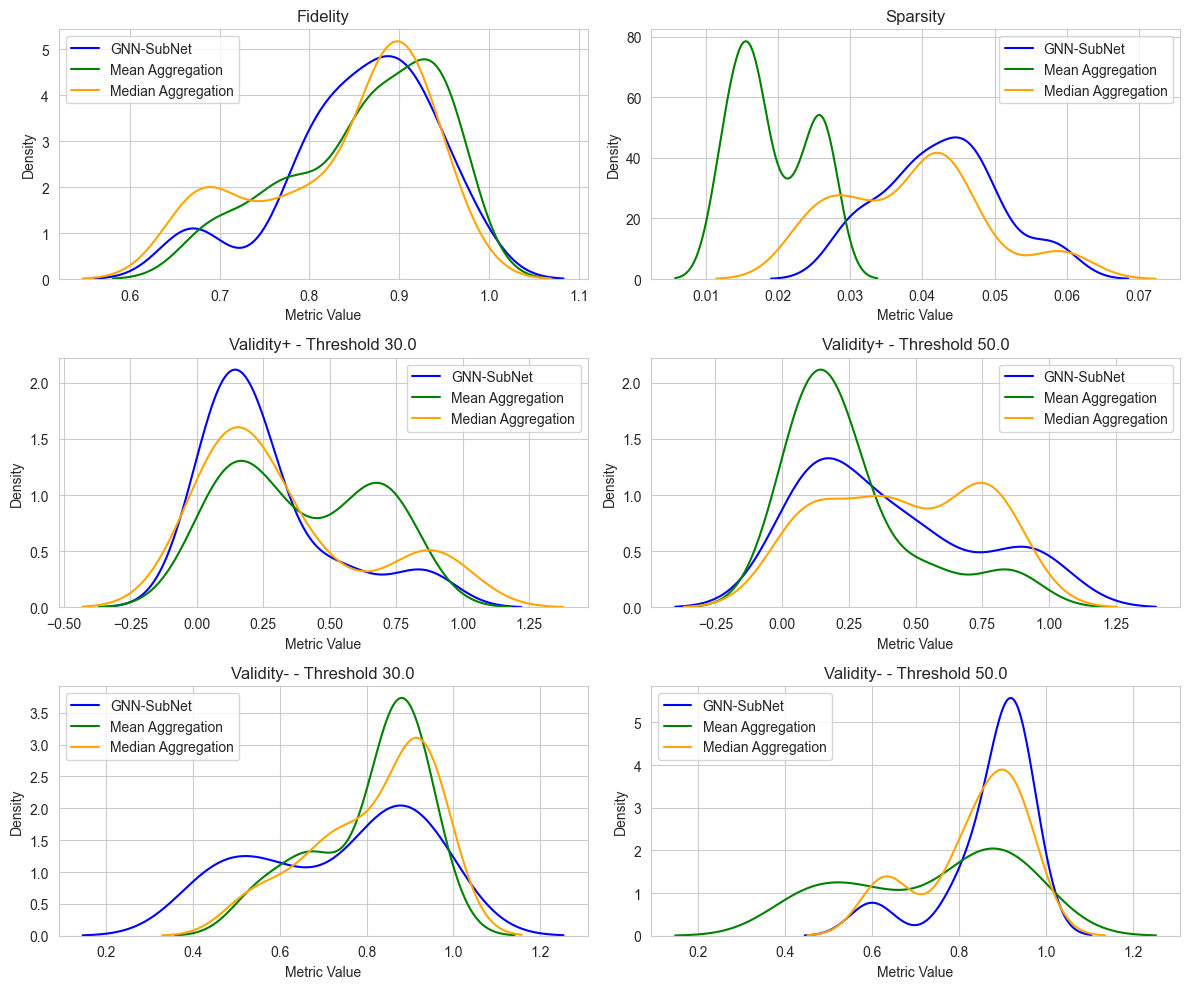

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

explainers = ['GNN-SubNet', 'Mean Aggregation', 'Median Aggregation']

fidelity = plot_metric_density('fidelity').reindex(columns=explainers)
sparsity = plot_metric_density('sparsity').reindex(columns=explainers)
validity_plus_30 = plot_metric_density('validity+')[0].reindex(columns=explainers)
validity_plus_50 = plot_metric_density('validity+')[1].reindex(columns=explainers)
validity_minus_30 = plot_metric_density('validity-')[0].reindex(columns=explainers)
validity_minus_50 = plot_metric_density('validity-')[1].reindex(columns=explainers)

metric_plots = [fidelity, sparsity, validity_plus_30, validity_plus_50, validity_minus_30, validity_minus_50]

print(fidelity)
print(validity_plus_30)

plot_titles = ['Fidelity', 'Sparsity', 'Validity+ - Threshold 30.0', 'Validity+ - Threshold 50.0', 'Validity- - Threshold 30.0', 'Validity- - Threshold 50.0']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

axes = axes.flatten()

colors = {'GNN-SubNet':'blue', 'Mean Aggregation':'green', 'Median Aggregation':'orange'}

# Loop through dataframes and plot each metric for each explainer
for ax, df, title in zip(axes, metric_plots, plot_titles):
    for col in df.columns:
        sns.kdeplot(data=df, x=col, ax=ax, label=col, color=colors[col])
    ax.set_title(title)
    ax.set_xlabel('Metric Value')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Variance of results
This code cell compiles a table with the variance of all metrics over the 10 runs for the 3 algorithms

In [ ]:
variance_gnn_subnet = final_table_gnn_subnet.groupby(['Threshold Value']).std()
variance_gnn_subnet = variance_gnn_subnet.drop(['Iteration'], axis=1)
variance_gnn_subnet.insert(0, 'Explainer', 'GNN_SubNet')

variance_modified_alg = final_table_modified_alg.groupby(['Threshold Value']).std()
variance_modified_alg = variance_modified_alg.drop(['Iteration'], axis=1)
variance_modified_alg.insert(0, 'Explainer', 'Mean Aggregation')

variance_quantile_alg = final_table_quantile_alg.groupby(['Threshold Value']).std()
variance_quantile_alg = variance_quantile_alg.drop(['Iteration'], axis=1)
variance_quantile_alg.insert(0, 'Explainer', 'Median Aggregation')

final_variance = pd.concat([variance_gnn_subnet, variance_modified_alg, variance_quantile_alg])

final_variance

## Other results

The code cells below obtain the results from other runs of the two explainers, pre-process and aggregate them
These results require more pre-processing than the other two folders

In [ ]:
def validity_plus_aggregation(validity_plus_row):
    """
    Computes Validity+ in terms of its confusion matrix as follows:
        validity+ = (mat[1,0] + mat[0,1] ) / (mat[0,0] + mat[0,1] + mat[1,0] + mat[1,1])
    """
    return (validity_plus_row[4] + validity_plus_row[5]) / (validity_plus_row[3:7].sum())

def validity_minus_aggregation(validity_minus_row):
    """
    Computes Validity- in terms of its confusion matrix as follows:
        validity- = (mat[0,0] + mat[1,1] ) /  (mat[0,0] + mat[0,1] + mat[1,0] + mat[1,1])
    """
    return (validity_minus_row[3] + validity_minus_row[6]) / (validity_minus_row[3:7].sum())

In [ ]:
def obtain_processed_results(path_to_results, pre_process_fidelities, pre_process_validities):

    fidelities = []
    fidelity_values_only = []
    sparsities = []
    validities_plus = []
    validities_minus = []

    for i in range(0, no_of_runs):

        # Save the fidelity
        fidelity_file = f'{path_to_results}/{i}_fidelities.csv'
        current_fidelity = pd.read_csv(fidelity_file, index_col = False, header=None)
        if i in pre_process_fidelities:
            fidelity_values_only.append(pd.DataFrame([[i, current_fidelity.mean(axis=None)]], columns=['Iteration', 'Fidelity']))
        else:
            fidelities.append(current_fidelity.drop(columns=[1]).rename(columns={0:'Iteration', 2:'Fidelity'}))

        # Save the sparsity
        sparsity_file = f'{path_to_results}/{i}_sparsities.csv'
        current_sparsity = pd.read_csv(sparsity_file, index_col = False, header=None)
        sparsities.append(current_sparsity.mean(axis=None))

        validity_plus_file = f'{path_to_results}/{i}_validity_plus.csv'
        current_validity_plus = pd.read_csv(validity_plus_file, index_col=False, header=None)

        validity_minus_file = f'{path_to_results}/{i}_validity_minus.csv'
        current_validity_minus = pd.read_csv(validity_minus_file, index_col=False, header=None)

        if i not in pre_process_validities:
            # Save Validity+
            current_validity_plus = current_validity_plus.rename(columns={0:'Iteration', 1:'Model Accuracy', 2:'Threshold Value', 3: 'Validity+'})
            validities_plus.append(current_validity_plus)

            # Save Validity-
            current_validity_minus = current_validity_minus.rename(columns={0:'Iteration', 1:'Model Accuracy', 2:'Threshold Value', 3: 'Validity-'})
            validities_minus.append(current_validity_minus)
        else:
            # Pre-process and save Validity+
            validity_plus_to_append = current_validity_plus.apply(validity_plus_aggregation, axis = 1)
            current_validity_plus = current_validity_plus.rename(columns={0:'Iteration', 1:'Model Accuracy', 2:'Threshold Value'})
            current_validity_plus["Validity+"] = validity_plus_to_append
            current_validity_plus = current_validity_plus.drop(current_validity_plus.iloc[:, [3, 4, 5, 6]], axis=1)
            validities_plus.append(current_validity_plus)
            # Pre-process and save Validity-
            validity_minus_to_append = current_validity_minus.apply(validity_minus_aggregation, axis = 1)
            current_validity_minus = current_validity_minus.rename(columns={0:'Iteration', 1:'Model Accuracy', 2:'Threshold Value'})
            current_validity_minus["Validity-"] = validity_minus_to_append
            current_validity_minus = current_validity_minus.drop(current_validity_minus.iloc[:, [3, 4, 5, 6]], axis=1)
            validities_minus.append(current_validity_minus)

    # Obtain a single data frame per metric
    validities_plus = pd.concat(validities_plus)
    validities_plus = validities_plus.drop_duplicates()

    validities_minus = pd.concat(validities_minus)
    validities_minus = validities_minus.drop_duplicates()

    fidelities = pd.concat(fidelities)

    if fidelity_values_only:
        fidelity_values_only = pd.concat(fidelity_values_only)
        fidelities = pd.concat([fidelities, fidelity_values_only])
    fidelities = fidelities.sort_values(by='Iteration')
    fidelities = fidelities.drop_duplicates()

    final_table = validities_plus

    final_table['validity-'] = validities_minus['Validity-']

    fidelities_to_append = []
    sparsities_to_append = []
    for i in final_table['Iteration']:
        fidelities_to_append.append(fidelities.iloc[np.int_(i), 1])
        sparsities_to_append.append(sparsities[np.int_(i)])
    final_table['fidelity'] = fidelities_to_append
    final_table['sparsity'] = sparsities_to_append

    return final_table

In [ ]:
path_to_results = "results_gnn_subnet"
final_table_gnn_subnet2 = obtain_processed_results(path_to_results, [], [5, 6, 7, 8, 9])

final_table_gnn_subnet2

In [ ]:
final_table_reduced_gnn_subnet = final_table_gnn_subnet2.groupby(['Threshold Value']).mean()
final_table_reduced_gnn_subnet = final_table_reduced_gnn_subnet.drop(['Iteration'], axis=1)
final_table_reduced_gnn_subnet

In [ ]:
path_to_results = "results_modified_alg"
final_table_modified_alg2 = obtain_processed_results(path_to_results, [0, 1, 2, 3, 4, 7, 8, 9], [0, 1, 2, 3, 4, 7, 8, 9])

final_table_modified_alg2

In [ ]:
final_table_reduced_modified_alg = final_table_modified_alg2.groupby(['Threshold Value']).mean()
final_table_reduced_modified_alg = final_table_reduced_modified_alg.drop(['Iteration'], axis=1)
final_table_reduced_modified_alg